# Computer Vision Kernels

## Import Statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Blur

In [2]:
# Load one or more images to practive with 
img_4 = cv2.imread('img/4.png')
img_clean_text= cv2.imread('img/clean-text.jpg')
img_n =cv2.imread('img/n.png')
img_noisy =cv2.imread('img/noisy.png')
img_notes = cv2.imread('img/notes.png')
img_sketch =cv2.imread('img/sketch.png')
img_text=cv2.imread('img/text.png')

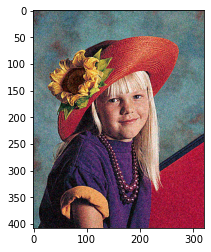

In [14]:
# plt.figure(figsize=(5,5))
plt.imshow(img_noisy[:,:,::-1])

In [19]:
# Create a blur kernel with numpy of size (3,3)
blur_kernel = np.ones((3,3),np.float32) / 9 # to see a clear blur image make kernel size to 9*9
blur = cv2.filter2D(img_noisy,-1,blur_kernel)

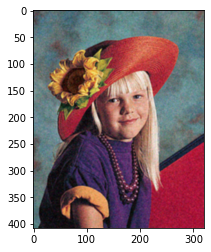

In [20]:
plt.imshow(blur[:,:,::-1])

[Hint](# "All values should sum up to 1 with the highest value in the center of the kernel, all values are positive.") 

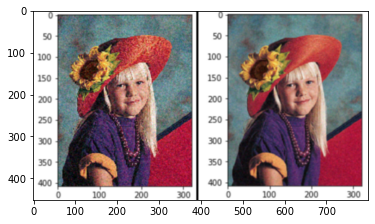

In [21]:
# Create a copy of the imagre and apply the kernel to the image unsing cv2.filter2D and display the blurred image
new_img_n = img_n.copy()
blur_new_img =cv2.filter2D(new_img_n,-1,blur_kernel)
plt.imshow(blur_new_img[:,:,::-1])

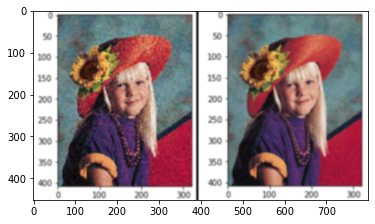

In [22]:
# Repeat the operations but with kernels of size (5,5) and (7,7) what is the difference?
kernel_5 = np.ones((5,5),np.float32) /25
kernel_7 = np.ones((7,7),np.float32) / 49
blur_new_img =cv2.filter2D(new_img_n, -1, kernel_5)
plt.imshow(blur_new_img[:,:,::-1])

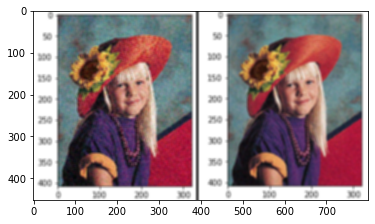

In [23]:
blur_new_img =cv2.filter2D(new_img_n, -1, kernel_7)
plt.imshow(blur_new_img[:,:,::-1])

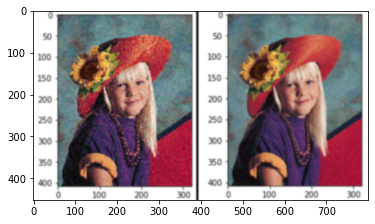

In [29]:
# Create a new copy of the original image and apply a GaussianBlur
new_img= img_n.copy()
blur_Gauss = cv2.GaussianBlur(new_img,(7,7),0)
plt.imshow(blur_Gauss[:,:,::-1])

[Hint](# "cv2.GaussianBlur") 

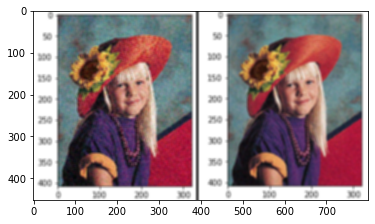

In [28]:
# Experiment with cv2.blur
blur2 =cv2.blur(new_img, (7,7))
plt.imshow(blur2[:,:,::-1])

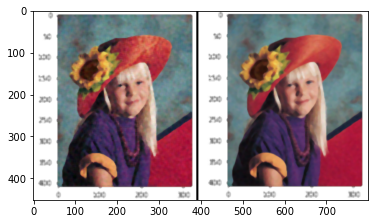

In [33]:
# Experiment with cv2.medianBlur
blur3 = cv2.medianBlur(new_img, 7)
plt.imshow(blur3[:,:,::-1])

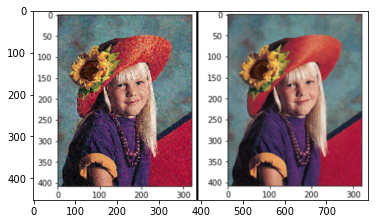

In [39]:
# Experiment with cv2.bilateralFilter
blur4 = cv2.bilateralFilter(new_img,7,25,25)
plt.imshow(blur4[:,:,::-1])

## Sharpening

In [50]:
# Create a 3 by 3 sharpening kernel with numpy
kernel =np.ones((5,5),np.float32) * -1
kernel[2,2] = 25
kernel

array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., 25., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.]], dtype=float32)

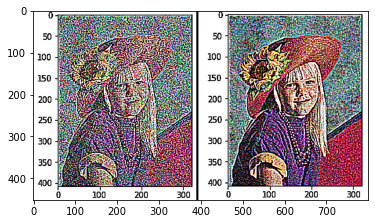

In [51]:
# Create a copy of the imagre and apply the kernel to the image unsing cv2.filter2D and display the filtered image
sharp = cv2.filter2D(new_img, -1, kernel)
plt.imshow(sharp[:,:,::-1])

[Hint](# "All values should sum up to 1 with the highest value in the center of the kernel.") 

## Edge detection

In [55]:
# Create a 3 by 3 kernel with numpy to detect edges
kernel =np.ones((5,5),np.float32) * -1
kernel[2,2] = 24

[Hint](# "All values should sum up to 0 with the highest value in the center of the kernel.") 

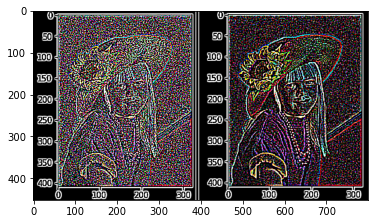

In [56]:
# Create a copy of the imagre and apply the kernel to the image unsing cv2.filter2D and display the filtered image
edge = cv2.filter2D(new_img,-1,kernel)
plt.imshow(edge[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


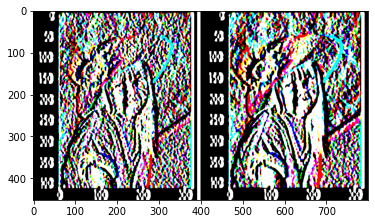

In [78]:
# Use cv2.Sobel to detect edges in the x orientation
blur2_Gauss = cv2.GaussianBlur(new_img,(7,7),0)
sobel_x = cv2.Sobel(blur2_Gauss, cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobel_x[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


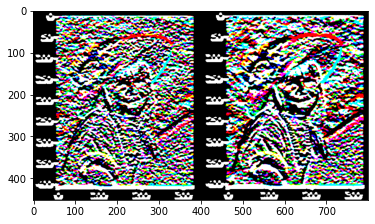

In [82]:
# Use cv2.Sobel to detect edges in the y orientation
sobel_y = cv2.Sobel(blur2_Gauss, cv2.CV_64F,0,1,ksize=5)
plt.imshow(sobel_y[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


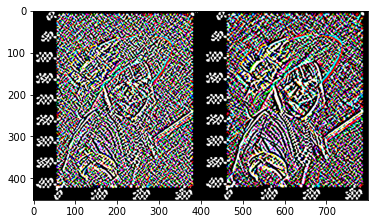

In [83]:
# Use cv2.Sobel and try to detect edges in the x and y orientation
sobel_xy = cv2.Sobel(blur2_Gauss, cv2.CV_64F,1,1,ksize=3)
plt.imshow(sobel_xy[:,:,::-1])

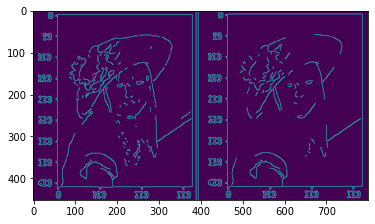

In [65]:
# Use cv2.Canny to detect edges
blur1_Gauss = cv2.GaussianBlur(new_img,(7,7),0)  # to be used first for canny
canny =cv2.Canny(blur1_Gauss,200,255)
plt.imshow(canny)